<a href="https://colab.research.google.com/github/raulbenitez/PIB/blob/main/Binaritzacio_Otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binarització i algorisme d'Otsu

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primer fem-li una ullada a les imatges amb les que treballarem



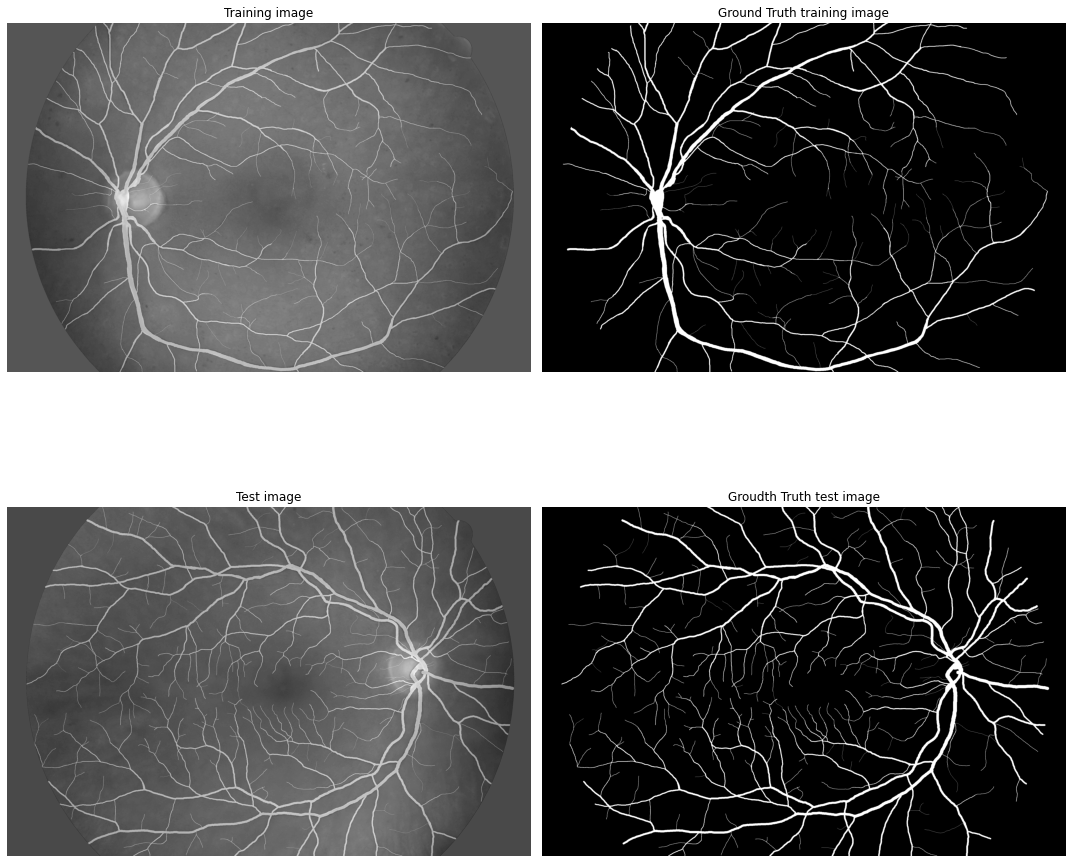

In [52]:
import skimage as sk 
import matplotlib.pyplot as plt
from skimage import io
import os 
from matplotlib import gridspec

# Path of the folder in your google drive unit where you have the images:
path = '/content/drive/MyDrive/Master Automatic Control and Robotics /PRML/PROBABILISTIC MODELS/Image segmentation lab'

I_train = sk.io.imread(os.path.join(path,'vessels_train.jpg')) 
I_train_GT = sk.io.imread(os.path.join(path,'vessels_train_GT.tif')) 
I_test = sk.io.imread(os.path.join(path,'vessels_test.jpg'))
I_test_GT = sk.io.imread(os.path.join(path,'vessels_test_GT.tif'))

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(I_test, cmap=plt.cm.gray)
ax2.set_title('Test image')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(I_test_GT, cmap=plt.cm.gray)
ax3.set_title('Groudth Truth test image')
ax3.set_axis_off()

plt.tight_layout()
plt.show()

# Binarització amb llindar global manual:

A straightforward segmentation approach would be setting a manual grayscale trheshold after inspection of the image histogram:

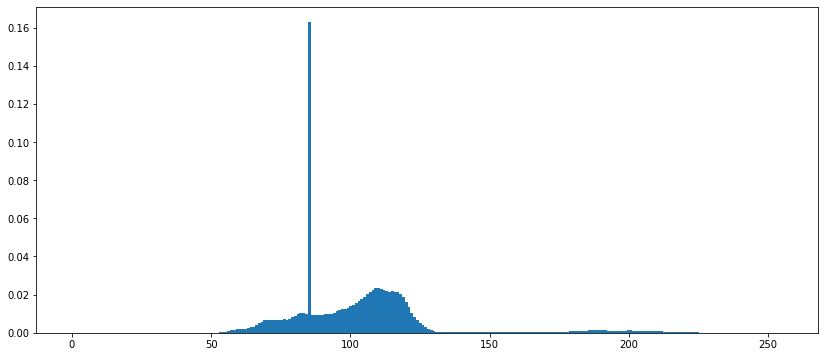

In [53]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8) 

fig = plt.figure(figsize=(14, 6))
plt.hist(v_I_train, bins=256,density=True)
plt.show()

since we observe two clear clusters in the histogram we can separate them using a threshold of around 150-160:

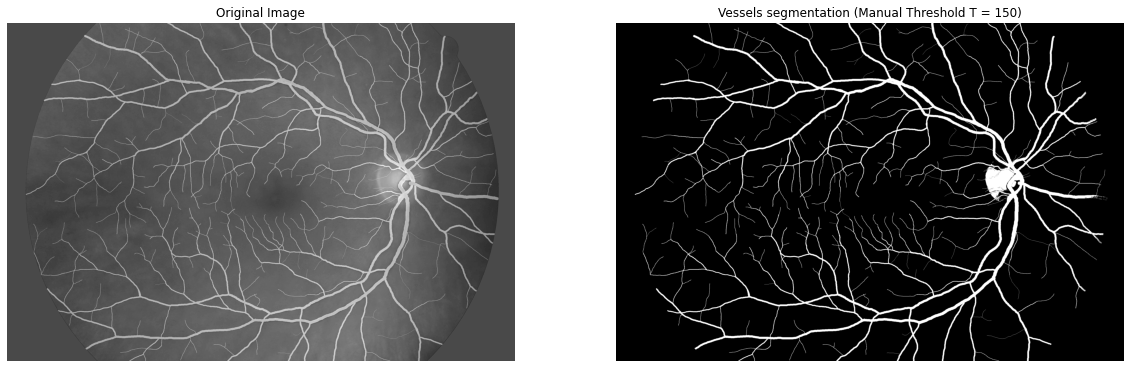

In [57]:
# Establir un llindar global:
threshold_manual = 150

# Apply manual threshold to test image (Image Binarization):
I_manual = I_test >= threshold_manual

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_manual, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Manual Threshold T = {})'.format(threshold_manual))
ax2.set_axis_off()

plt.show()

## Algorisme d'Otsu (llindar òptim global):

L'algorisme d'Otsu permet identificar un llindar global òptim de forma automàtica. 

L'algorisme troba el llindar maximitzant la **variança entre classes** $\sigma _{b}^{2}(t)$, definida en funció de la diferència entre les mitjanes dels dos clústers de l'histograma de la imatge (patró i fons, respectivament):

$\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

on $\omega _{0}(t)$ representa la fracció de píxels que queden per sota del llindar t i $\omega _{1}(t)$ la fracció de píxels que queden per sobre del llindar t. 

L'algorisme funciona aplicant la següent seqüència:

1. Calcula les probabilitats de cadascun dels nivells d'intensitat (histograma) $p(i), i=0,\dots L$ on $L=2^n$ per una imatge en escala de grisos amb $n$ bits.

2. Escombrar tots els possibles llindars d'intensitat $t=1,\ldots L-1$ 

    2.1 Actualitzar $\omega _{i}$ i les mitjanes $\mu _{i}$

$\omega _{0}(t)=\sum _{i=0}^{t-1}p(i)$

$\omega _{1}(t)=\sum _{i=t}^{L-1}p(i)$

$\mu _{0}(t)={\frac {\sum _{i=0}^{t-1}ip(i)}{\omega _{0}(t)}}$

$\mu _{1}(t)={\frac {\sum _{i=t}^{L-1}ip(i)}{\omega _{1}(t)}}$

    2.2 Calcular la variança entre classes: 
        
$\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

3. El llindar d'Otsu és aquell que presenta la variança entre classes màxima $\sigma _{b}^{2}(t)$ 

$t_{otsu} = argmax_{t} \sigma _{b}^{2}(t)$

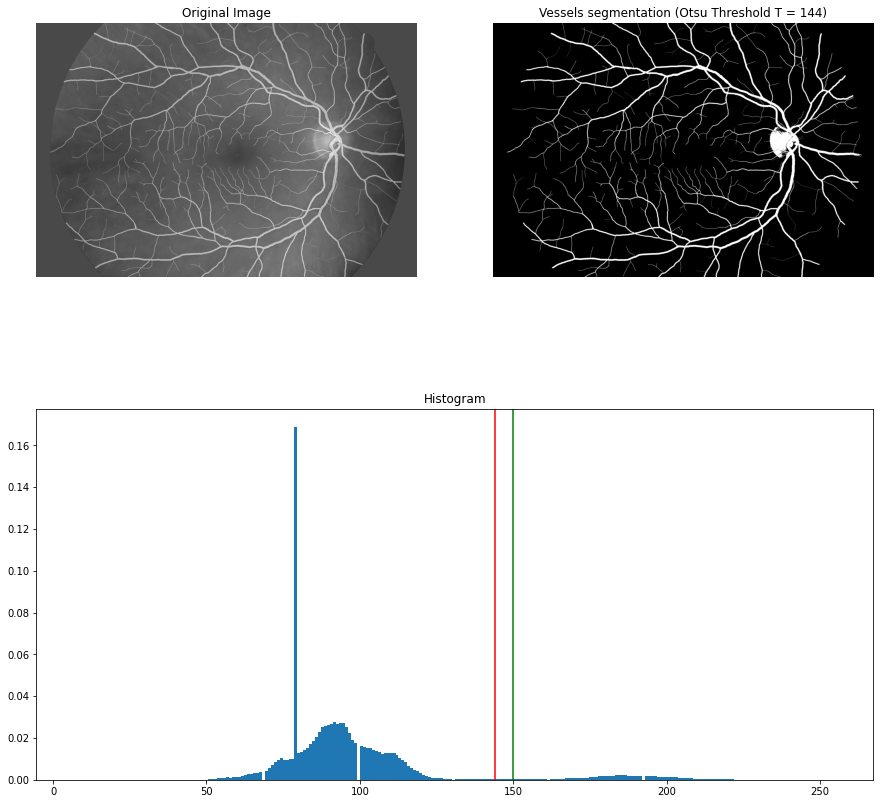

In [58]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(I_train)

# Apply threshold to test image:
I_otsu = I_test >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(I_test.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.axvline(threshold_manual, color='g')
ax3.set_title('Histogram')
plt.show()

# Otsu local:

https://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_local_otsu.html

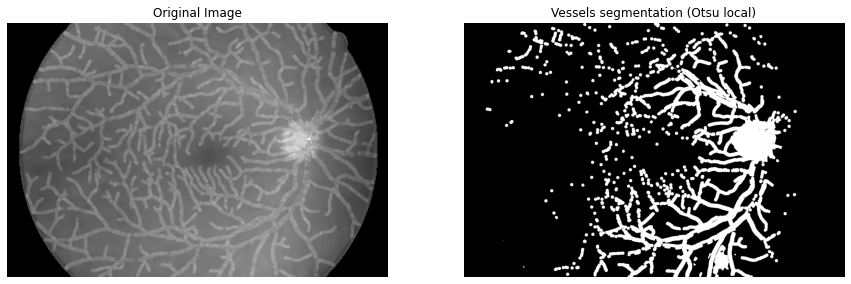

In [65]:
from skimage.morphology import disk
from skimage.filters import rank

# Apply local Otsu threshold to test image:

radius = 15
selem = disk(radius)

I_otsu_local = rank.otsu(I_test, selem)
I_otsu_local_binaritzat = I_otsu_local > 120

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_otsu_local, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu_local_binaritzat, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu local)')
ax2.set_axis_off()
plt.show()

# Llindars locals estadístics adaptatius:



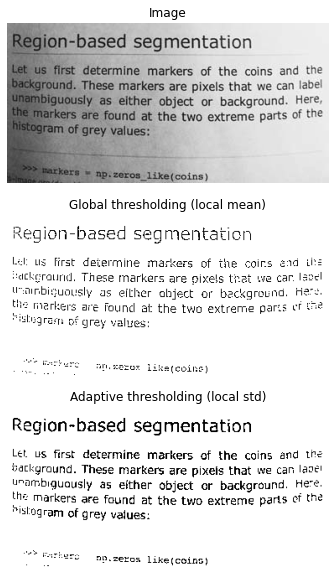

In [74]:
from skimage import data
from skimage.filters import threshold_local

image = data.page()

# local mean:
block_size = 3
binary_image1 = image > 0.65*threshold_local(image,block_size, 'mean')

# Criteris personalitzats: local mean + std:
func = lambda arr: 0.3*arr.mean() + 1.2*arr.std()
binary_image2 = image > threshold_local(image, block_size, 'generic',param=func)

fig, axes = plt.subplots(nrows=3, figsize=(14, 10))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_image1)
ax1.set_title('Global thresholding (local mean)')

ax2.imshow(binary_image2)
ax2.set_title('Adaptive thresholding (local std)')

for ax in axes:
    ax.axis('off')

plt.show()

In [70]:
image.shape

(191, 384)